### 데이터 분석 실습 프로젝트 결과

 → 대한민국과 미국의 코로나 감염 현황을 하나의 데이터 셋을 사용하여 비교 분석하였음

 → 데이터 분석 결과 → 선 그래프로 시각화

 -  현재 대한민국보다 미국의 코로나 감염 현황 비율이 더 나은 상황인 것을 알 수 있었음

### 프로젝트 진행 방향

→ 현재 하와이의 인구는 미국 인구의 약 0.42%

→ 지난 프로젝트에서 사용한 데이터 셋에 존재하지 않는 새로운 데이터를 찾아 기존 데이터 셋
에 합치는 작업을 수행


### 1. 데이터 수집

1) 필요한 데이터 셋 수집하기

• 필요한 데이터 : 하와이의 코로나 감염 현황 데이터

→ 미국 코로나 바이러스 주별 확진자 데이터 다운로드

• 구글에 ‘uscoronavirus states cases data download’를 입력해 검색

→ 미국 질병 관리 및 예방 센터CDC의 웹 사이트 링크(https://data.cdc.gov)를 찾아 클릭
 미국 질병 관리 및 예방 센터에서 제공하는 테이블 형태의 데이터 확인

2) 데이터 필터링, 정렬, 추출하기

데이터 필터링

• [그림4-3] 하와이 주 코드인 HI 테이블에 데이터가 있는지 확인하기

• 필터링 (Filtering)

→ 데이터 셋에 특정 조건을 주어 데이터를 추려내는 과정

→ 테이블 오른쪽 상단에 있는 메뉴 중 [Filter]를 클릭

→ 화면 왼쪽 있는 [Filter] 패널 → <+ Add a New Filter Condition> 버튼 클릭

• 필터 설정하기

1. 행 이름 submission_date를 클릭해 state로 변경

2. 행 이름 옆의 is는 ‘~와 같은’이라는 의미임. 기본 설정을 그대로 유지함, 이 설정에는 다음
과 같은 조건을 넣을 수 있음


  - is: ~와 같은   / is not: ~와 같지 않은

  - starts with: ~로 시작하는 / contains: ~를 포함하는

  - does not contain: ~를 포함하지 않는 / is blank: 값이 없는

• 필터 설정하기

3. 하와이 주를 의미하는 HI를 텍스트 상자에 입력→ 왼쪽의 체크 박스를 클릭
잠시 로딩을 거쳐 오른쪽 테이블에 데이터가 필터링됨

데이터 정렬

• 날짜순으로 데이터 정렬하기

→ 첫 번째 열 이름 옆의 햄버거 버튼 ( )을 클릭 → 두 가지 옵션의 화살표 방향 확인

 -  Sort Ascending: 오름차순 정렬

 -  Sort Descending: 내림차순 정렬

→ [Sort Ascending]을 클릭 → 날짜순으로 오름차순 정렬하고 테이블 데이터를 확인

• 가장 최근 데이터 확인하기

→ [그림 4-10]을 보면 데이터가 2020년 1월 22일부터 시작되고 있음

→ 행 이름의 화살표를 클릭 → 정렬 기준을 반대로 변경

→ 현재(2022년 7월 22일) 기준으로 전일 데이터인 최신 데이터까지 포함된 데이터 셋인 것을
확인할 수 있음

• 테이블 오른쪽 상단의 메뉴 → [Export]를 클릭

• 왼쪽 패널 [Export]로 변경 → [CSV]를 클릭

• 다운로드 된 CSV 파일 → C:\data에 저장 후 이름을 hawaii-coviddata로 수정



### 2. 데이터 정제 및 가공

※ CSV 파일 탑재

• CSV 파일을 주피터 노트북에 탑재하여 데이터 일부를 확인

→ 웹 사이트에서 본데이터가 주피터 노트북에 잘 탑재된 것을 확인할 수 있음

※ 결손 데이터, NaN

• NaN(Not a Number)은 데이터가 존재하지 않을 때 판다스에서 사용하는 값임

→ NaN이 표기된 곳에는 데이터가 존재하지 않음

• 전체 NaN 데이터의 분포가 얼마나 되는지 info() 메서드로 확인

• raw_hawaii_df.info() : 분석하기

① 이 데이터프레임의 총 엔트리 개수 : 912개

② 해당 컬럼에 값이 존재하는 엔트리 개수를 확인

• 결손 데이터가 존재하는 이유는 다양함

→ 처음부터 값이 없는 경우도 있고, 실수로 값이 저장되지 않은 경우도 있음

→ 상황에 따라 결손 데이터를 처리하는 방법도 다양함

• 이번 프로젝트에서 필요한 컬럼인 submission_date(제출 날짜)와 tot_cases
(전체 확진자 수)의 값이 모두 존재하므로 별도로 처리하지는 않음

• 판다스에서 NaN이 보이는 경우에는 해당 항목에 값이 존재하지 않는다는 것을 기억하기

In [68]:
import pandas as pd

In [69]:
# CSV 파일 읽어오기
raw_hawaii_df = pd.read_csv('/content/hawaii-covid-data.csv')
# 일부 데이터 확인하기
raw_hawaii_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,10/26/2021,HI,80876,NaN,NaN,69,10.0,883,NaN,NaN,0,0.0,10/27/2021 02:21:35 PM,Not agree,Not agree
1,06/17/2021,HI,35862,NaN,NaN,31,0.0,504,NaN,NaN,0,0.0,06/18/2021 01:48:26 PM,Not agree,Not agree
2,12/30/2021,HI,106350,NaN,NaN,3425,368.0,1074,NaN,NaN,0,0.0,12/31/2021 02:32:16 PM,Not agree,Not agree
3,11/12/2020,HI,16171,NaN,NaN,94,0.0,221,NaN,NaN,0,0.0,11/13/2020 02:54:34 PM,Not agree,Not agree
4,06/15/2021,HI,35802,NaN,NaN,33,5.0,503,NaN,NaN,0,0.0,06/16/2021 03:10:20 PM,Not agree,Not agree


In [70]:
# 데이터 정보 확인하기
raw_hawaii_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  912 non-null    object 
 1   state            912 non-null    object 
 2   tot_cases        912 non-null    int64  
 3   conf_cases       0 non-null      float64
 4   prob_cases       0 non-null      float64
 5   new_case         912 non-null    int64  
 6   pnew_case        869 non-null    float64
 7   tot_death        912 non-null    int64  
 8   conf_death       0 non-null      float64
 9   prob_death       0 non-null      float64
 10  new_death        912 non-null    int64  
 11  pnew_death       823 non-null    float64
 12  created_at       912 non-null    object 
 13  consent_cases    912 non-null    object 
 14  consent_deaths   912 non-null    object 
dtypes: float64(6), int64(4), object(5)
memory usage: 107.0+ KB


탑재한 데이터 셋의 행 중 필요한 행만 추출하기

-> 데이터 일부가 특정 규칙이 없음을 알 수 있음

In [71]:
# 필요한 행 추출
filtered_hawaii_df = raw_hawaii_df[['submission_date', 'tot_cases']]
# 일부 데이터 확인
filtered_hawaii_df.head()

,submission_date,tot_cases
0,10/26/2021,80876
1,06/17/2021,35862
2,12/30/2021,106350
3,11/12/2020,16171
4,06/15/2021,35802


### 데이터 정렬하기

• sort_values() 메서드

→ submission_date를 기준으로 정렬→ 연도와 무관하게 정렬된 것을 확인할 수 있음


In [72]:
# 데이터 정렬하기
sorted_hawaii_df = filtered_hawaii_df.sort_values(by='submission_date')
# 정렬된 데이터 확인하기
sorted_hawaii_df

,submission_date,tot_cases
480,01/01/2021,21258
726,01/01/2022,112283
371,01/02/2021,21417
300,01/02/2022,115400
507,01/03/2021,21539
...,...,...
40,12/29/2021,102925
842,12/30/2020,20851
2,12/30/2021,106350
361,12/31/2020,21026


### 데이터 타입 변경한 행 추가하기
• to_datetime() 메서드

→ 데이터프레임에 날짜 데이터 타입의 값으로 이루어진 열을 추가

In [73]:
# submission_date를 date 타입으로 변환하여 열 추가하기
sorted_hawaii_df['date'] = pd.to_datetime(filtered_hawaii_df['submission_date'])
# 일부 데이터 확인하기
sorted_hawaii_df.head()

,submission_date,tot_cases,date
480,01/01/2021,21258,2021-01-01
726,01/01/2022,112283,2022-01-01
371,01/02/2021,21417,2021-01-02
300,01/02/2022,115400,2022-01-02
507,01/03/2021,21539,2021-01-03


### 데이터 타입 변경한 행 추가하기
• 추가한 date 행 기준으로 정렬하고 확인하기

→ 명명인수 inplace를 True로 설정 → 해당 데이터프레임 객체의 값이 바로 변경됨

In [74]:
# 데이터 정렬하기
sorted_hawaii_df.set_index('date', inplace=True)
# 데이터 확인하기
sorted_hawaii_df

,submission_date,tot_cases
date,,
2021-01-01,01/01/2021,21258
2022-01-01,01/01/2022,112283
2021-01-02,01/02/2021,21417
2022-01-02,01/02/2022,115400
2021-01-03,01/03/2021,21539
...,...,...
2021-12-29,12/29/2021,102925
2020-12-30,12/30/2020,20851
2021-12-30,12/30/2021,106350


### 색인 수정하기
• set_index() 메서드 → 색인을 date로 변경

• 명명 인수인 inplace를 True로 설정 → 동일 변수의 객체를 변경

In [75]:
# 색인 변경하기
hawaii_total_cases = sorted_hawaii_df['tot_cases']
# 데이터 확인하기
hawaii_total_cases

date
2021-01-01     21258
2022-01-01    112283
2021-01-02     21417
2022-01-02    115400
2021-01-03     21539
               ...  
2021-12-29    102925
2020-12-30     20851
2021-12-30    106350
2020-12-31     21026
2021-12-31    109576
Name: tot_cases, Length: 912, dtype: int64

### 열 데이터 추출하여 시리즈 만들기
• 하와이 확진자 수로 이루어진 시리즈 만들기

→ 날짜를 색인으로 하고, 전체 확진자 수를 값으로 하는 시리즈를 생성

### 하와이 주와 대한민국 인구 비율 구하기
• 구글에서 ‘2022 hawaii population’를 검색

→ 2022년 기준 1,433,336명인 것을 확인 → 대한민국과 하와이의 인구 비율을 구함

In [76]:
# csv 파일 읽어오기
raw_df = pd.read_csv('owid-covid-data.csv')
# raw_df = pd.read_csv('/content/owid-covid-data.csv')도 가능
print(raw_df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
192296      ZWE    Africa     Zimbabwe  2022-06-03     253236.0      185.0   
192297      ZWE    Africa     Zimbabwe  2022-06-04     253236.0        0.0   
192298      ZWE    Africa     Zimbabwe  2022-06-05     253338.0      102.0   
192299      ZWE    Africa     Zimbabwe  2022-06-06     253508.0      170.0   
192300      ZWE    Africa     Zimbabwe  2022-06-07     253637.0      129.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [77]:
# 원하는 열 리스트 만들기
selected_columns = ['iso_code', 'location', 'date', 'total_cases', 'population']
# 원하는 열로 개정된 데이터 프레임 생성
revised_df = raw_df[selected_columns]
# 개정된 데이터 프레임 데이터 일부 확인하기
revised_df.head()

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-02-24,5.0,39835428.0
1,AFG,Afghanistan,2020-02-25,5.0,39835428.0
2,AFG,Afghanistan,2020-02-26,5.0,39835428.0
3,AFG,Afghanistan,2020-02-27,5.0,39835428.0
4,AFG,Afghanistan,2020-02-28,5.0,39835428.0


In [79]:
# 열 location 값 확인하기
locations = revised_df['location']
locations

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
192296       Zimbabwe
192297       Zimbabwe
192298       Zimbabwe
192299       Zimbabwe
192300       Zimbabwe
Name: location, Length: 192301, dtype: object

In [80]:
# location 열의 유일 값 확인하기
locations.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [81]:
# 대한민국 데이터 프레임 생성하기
kor_df = revised_df[revised_df.location == 'South Korea']
# 색인 변경하기
kor_date_index_df = kor_df.set_index('date')
# 데이터 일부 확인하기
kor_date_index_df.head()

,iso_code,location,total_cases,population
date,,,,
2020-01-22,KOR,South Korea,1.0,51305184.0
2020-01-23,KOR,South Korea,1.0,51305184.0
2020-01-24,KOR,South Korea,2.0,51305184.0
2020-01-25,KOR,South Korea,2.0,51305184.0
2020-01-26,KOR,South Korea,3.0,51305184.0


In [82]:
# 미국 데이터 프레임 생성하기
usa_df = revised_df[revised_df.location == 'United States']
# 색인 변경하기
usa_date_index_df = usa_df.set_index('date')
# 값 일부 확인하기
usa_date_index_df.head()

,iso_code,location,total_cases,population
date,,,,
2020-01-22,USA,United States,1.0,332915074.0
2020-01-23,USA,United States,1.0,332915074.0
2020-01-24,USA,United States,2.0,332915074.0
2020-01-25,USA,United States,2.0,332915074.0
2020-01-26,USA,United States,5.0,332915074.0


In [83]:
# 대한민국 확진자 수 구하기
kor_total_cases = kor_date_index_df['total_cases']
kor_total_cases

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           3.0
                 ...    
2022-06-03    18153851.0
2022-06-04    18163686.0
2022-06-05    18168708.0
2022-06-06    18174880.0
2022-06-07    18188200.0
Name: total_cases, Length: 868, dtype: float64

In [84]:
# 미국 확진자 수 구하기
usa_total_cases = usa_date_index_df['total_cases']
usa_total_cases

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           5.0
                 ...    
2022-06-03    84724329.0
2022-06-04    84748884.0
2022-06-05    84762022.0
2022-06-06    84882287.0
2022-06-07    85003945.0
Name: total_cases, Length: 868, dtype: float64

In [85]:
# 색인 확인하기(색인으로 사용할 날짜 값 대한민국 데이터 셋에서 가져오기)
kor_date_index_df.index

Index(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       ...
       '2022-05-29', '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02',
       '2022-06-03', '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-07'],
      dtype='object', name='date', length=868)

In [86]:
# 대한민국 인구
kor_population = kor_date_index_df['population']['2022-01-22']

In [87]:
# 하와이 확진자 수 시리즈 만들기
hawaii_population = 1_433_336
# 하와이와 대한민국의 인구 비율 구하기
hawaii_rate = round((hawaii_population / kor_population), 2)
# 데이터 확인하기
hawaii_rate

0.03

In [88]:
# 확진자 비율을 적용한 최종 데이터프레임 생성하기
final_hawaii_revised_df = pd.DataFrame({
    'KOR': kor_total_cases * hawaii_rate,      # 비율 반영
    'HAWAII': hawaii_total_cases
    }, index=kor_date_index_df.index
)

final_hawaii_revised_df

,KOR,HAWAII
date,,
2020-01-22,0.03,0
2020-01-23,0.03,0
2020-01-24,0.06,0
2020-01-25,0.06,0
2020-01-26,0.09,0
...,...,...
2022-06-03,544615.53,275631
2022-06-04,544910.58,275631
2022-06-05,545061.24,275631


-> HAWAII 열의 모든 값이
NaN으로 설정 되어 있음

## 데이터 2차 가공
### 1차 가공의 문제점

• 데이터프레임 값으로 사용한 2개의 시리즈 데이터를 다시 살펴보기

• 대한민국 확진자 수 시리즈

• 하와이 확진자 수 시리즈

In [89]:
# 대한민국 확진자 수 시리즈 확인하기
kor_total_cases

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           3.0
                 ...    
2022-06-03    18153851.0
2022-06-04    18163686.0
2022-06-05    18168708.0
2022-06-06    18174880.0
2022-06-07    18188200.0
Name: total_cases, Length: 868, dtype: float64

In [90]:
# 하와이 확진자 수 시리즈 확인하기
hawaii_total_cases

date
2021-01-01     21258
2022-01-01    112283
2021-01-02     21417
2022-01-02    115400
2021-01-03     21539
               ...  
2021-12-29    102925
2020-12-30     20851
2021-12-30    106350
2020-12-31     21026
2021-12-31    109576
Name: tot_cases, Length: 912, dtype: int64

In [91]:
# 대한민국 시리즈 색인 데이터 타입 확인
str(kor_total_cases.index.dtype)

'object'

In [92]:
# 하와이 시리즈 색인 데이터 타입 확인
str(hawaii_total_cases.index.dtype)

'datetime64[ns]'

• NaN이 표시된 이유 : 색인의 데이터 타입이 다르기 때문

• 대한민국 시리즈의 색인 데이터 타입 : 문자열을 의미하는 ‘string’

• 하와이 시리즈의 색인 데이터 타입 : 날짜 타입을 의미하는 ‘datetime64[ns]’

→ 데이터 타입이 달랐기 때문에 하와이 데이터의 값이 데이터프레임에 들어올 수 없었음

### 색인 데이터 타입 변경

• astype() 메서드

→ 판다스에서는 제공하는 색인 데이터 타입을 변경할 수 있는 메서드

→ 색인 객체에서 astype() 메서드를 사용

※ 하와이 시리즈 색인의 데이터 타입을 문자열로 변경한 뒤, 다시 데이터 타입을 확인


In [93]:
# 하와이 시리즈 색인 데이터 타입 문자열로 변경하기
hawaii_total_cases.index = hawaii_total_cases.index.astype('string')
# 하와이 시리즈 색인 데이터 타입 재확인
str(hawaii_total_cases.index.dtype)

'string'

### 3. 데이터 시각화

In [94]:
# 확진자 비율을 적용한 최종 데이터프레임 생성하기
final_hawaii_revised_df = pd.DataFrame({
    'KOR': kor_total_cases * hawaii_rate,     # 비율반영
    'HAWAII': hawaii_total_cases
    }, index=kor_date_index_df.index
)

# 데이터 확인하기
final_hawaii_revised_df

,KOR,HAWAII
date,,
2020-01-22,0.03,0
2020-01-23,0.03,0
2020-01-24,0.06,0
2020-01-25,0.06,0
2020-01-26,0.09,0
...,...,...
2022-06-03,544615.53,275631
2022-06-04,544910.58,275631
2022-06-05,545061.24,275631


시각화를 위한 최종 데이터 프레임 생성

• 올해 데이터(2022)로 그래프 표현하기 : X축 라벨 표기는 45도 기울여서 출력

<Axes: xlabel='date'>

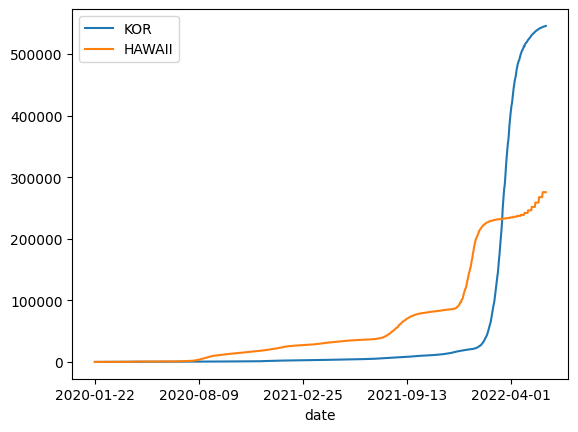

In [95]:
# 선 그래프 그리기
final_hawaii_revised_df.plot.line()

<Axes: xlabel='date'>

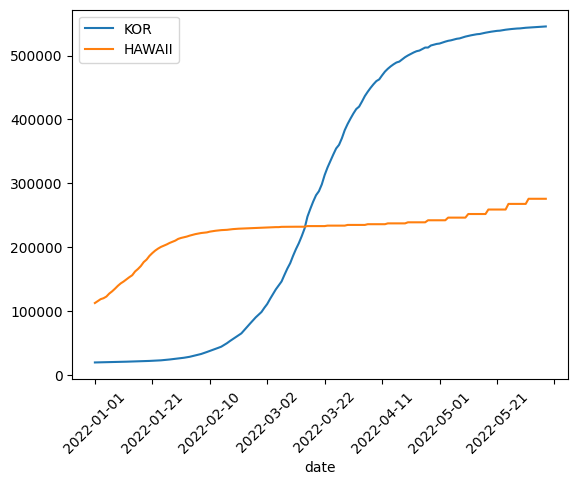

In [96]:
# 올해 그래프 확인하기(2022)
final_hawaii_revised_df['2022-01-01':].plot.line(rot=45)

### 마무리

문제해결

→ 하와이 주의 코로나 확진자 수 비율은 서서히 증가하고 있으나, 대한민국에 비해 절반 수준
정도의 수치를 보이고 있음

→ 그렇기 때문에 안나가 친구를 하와이 주로 초대해도 크게 걱정할 필요가 없어 보임


In [97]:
# 2장 연습해보기 1번 문제

In [98]:
# 대한민국 데이터 프레임 생성하기
kor_df = revised_df[revised_df.location == 'South Korea']
# 색인 변경하기
kor_date_index_df = kor_df.set_index('date')
# 데이터 일부 확인하기
kor_date_index_df.head()

,iso_code,location,total_cases,population
date,,,,
2020-01-22,KOR,South Korea,1.0,51305184.0
2020-01-23,KOR,South Korea,1.0,51305184.0
2020-01-24,KOR,South Korea,2.0,51305184.0
2020-01-25,KOR,South Korea,2.0,51305184.0
2020-01-26,KOR,South Korea,3.0,51305184.0


In [99]:
# 미국 데이터 프레임 생성하기
usa_df = revised_df[revised_df.location == 'United States']
# 색인 변경하기
usa_date_index_df = usa_df.set_index('date')
# 값 일부 확인하기
usa_date_index_df.head()

,iso_code,location,total_cases,population
date,,,,
2020-01-22,USA,United States,1.0,332915074.0
2020-01-23,USA,United States,1.0,332915074.0
2020-01-24,USA,United States,2.0,332915074.0
2020-01-25,USA,United States,2.0,332915074.0
2020-01-26,USA,United States,5.0,332915074.0


In [100]:
# 대한민국 확진자 수 구하기
kor_total_cases = kor_date_index_df['total_cases']
kor_total_cases

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           3.0
                 ...    
2022-06-03    18153851.0
2022-06-04    18163686.0
2022-06-05    18168708.0
2022-06-06    18174880.0
2022-06-07    18188200.0
Name: total_cases, Length: 868, dtype: float64

In [101]:
# 미국 확진자 수 구하기
usa_total_cases = usa_date_index_df['total_cases']
usa_total_cases

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           5.0
                 ...    
2022-06-03    84724329.0
2022-06-04    84748884.0
2022-06-05    84762022.0
2022-06-06    84882287.0
2022-06-07    85003945.0
Name: total_cases, Length: 868, dtype: float64

In [102]:
# 대한민국 인구
kor_population = kor_date_index_df['population']['2022-01-22']

In [103]:
# 하와이 확진자 수 시리즈 만들기
hawaii_population = 1_433_336
# 하와이와 대한민국의 인구 비율 구하기
hawaii_rate = round((kor_population / hawaii_population), 2)
# 데이터 확인하기
hawaii_rate

35.79

In [104]:
# 미국 확진자 수 시리즈 만들기
usa_population = 332_403_650
# 미국과 대한민국의 인구 비율 구하기
usa_rate = round((kor_population / usa_population), 2)
# 데이터 확인하기
usa_rate

0.15

In [105]:
# 대한민국 시리즈 색인 데이터 타입 확인
str(kor_total_cases.index.dtype)

'object'

In [106]:
# 미국 시리즈 색인 데이터 타입 확인
str(usa_total_cases.index.dtype)

'object'

In [107]:
# 하와이 시리즈 색인 데이터 타입 확인
str(hawaii_total_cases.index.dtype)

'string'

In [108]:
# 확진자 비율을 적용한 최종 데이터프레임 생성하기
fffinal_revised_df = pd.DataFrame({
    'KOR': kor_total_cases,     # 비율반영
    'HAWAII': hawaii_total_cases * hawaii_rate,
    'USA' : usa_total_cases * usa_rate
    }, index=kor_date_index_df.index
)

# 데이터 확인하기
fffinal_revised_df

,KOR,HAWAII,USA
date,,,
2020-01-22,1.0,0.00,0.15
2020-01-23,1.0,0.00,0.15
2020-01-24,2.0,0.00,0.30
2020-01-25,2.0,0.00,0.30
2020-01-26,3.0,0.00,0.75
...,...,...,...
2022-06-03,18153851.0,9864833.49,12708649.35
2022-06-04,18163686.0,9864833.49,12712332.60
2022-06-05,18168708.0,9864833.49,12714303.30


<Axes: xlabel='date'>

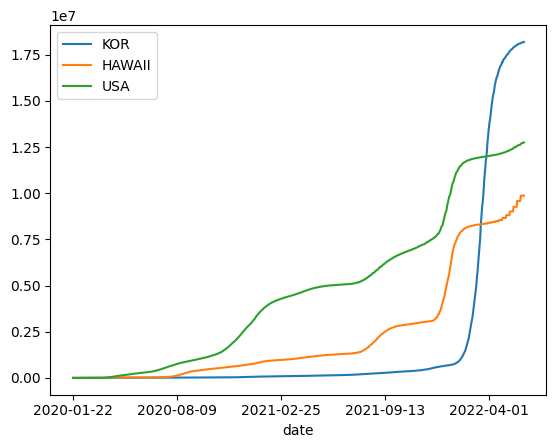

In [109]:
# 선 그래프 그리기
fffinal_revised_df.plot.line()

<Axes: xlabel='date'>

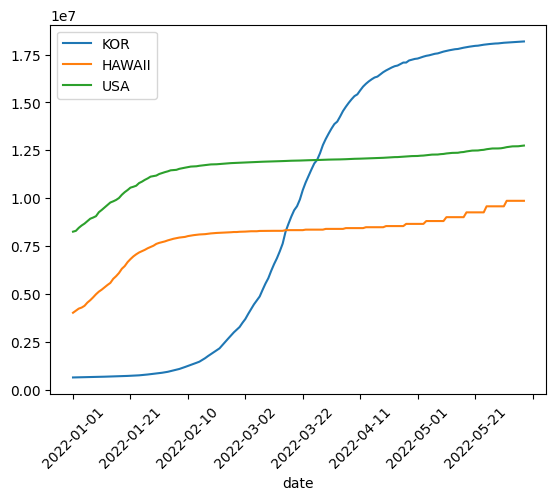

In [110]:
# 올해 그래프 확인하기(2022)
fffinal_revised_df['2022-01-01':].plot.line(rot=45)

In [111]:
# 2장 연습문제 2번

In [113]:
import numpy as np
import pandas as pd

In [123]:
# CSV 파일 읽어오기
raw_states_df = pd.read_csv('/content/states-covid-data.csv')
# 일부 데이터 확인하기
raw_states_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,02/11/2022,IL,2987502,2987502.0,0.0,0,0.0,35725,31795.0,3930.0,0,0.0,02/12/2022 02:17:24 PM,Agree,Agree
1,08/16/2020,CA,621562,621562.0,0.0,7873,0.0,11104,11104.0,0.0,110,0.0,08/18/2020 12:00:00 AM,Agree,Agree
2,06/30/2021,CA,3710454,3710454.0,0.0,-4359,0.0,63023,63023.0,0.0,24,0.0,07/02/2021 12:00:00 AM,Agree,Agree
3,08/27/2020,WA,73023,NaN,NaN,573,21.0,1890,NaN,NaN,10,0.0,08/27/2020 12:00:00 AM,NaN,NaN
4,04/20/2021,WA,387379,NaN,NaN,1180,297.0,5407,NaN,NaN,13,0.0,04/20/2021 12:00:00 AM,NaN,NaN


In [124]:
raw_states_df['date'] = pd.to_datetime(raw_states_df['submission_date'])
raw_states_df.sort_values(by='date', inplace=True)
raw_states_df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,date
2077,01/22/2020,TX,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree,2020-01-22
1458,01/22/2020,VA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree,2020-01-22
2978,01/22/2020,WA,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/22/2020 12:00:00 AM,NaN,NaN,2020-01-22
242,01/22/2020,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/24/2020 12:00:00 AM,Agree,Not agree,2020-01-22
314,01/22/2020,IL,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree,2020-01-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,07/21/2022,IL,3523006,3523006.0,0.0,6636,0.0,38799,34302.0,4497.0,14,3.0,07/22/2022 01:17:16 PM,Agree,Agree,2022-07-21
3167,07/21/2022,CA,10495155,9752509.0,742646.0,0,0.0,92292,NaN,NaN,0,0.0,07/22/2022 01:17:16 PM,Agree,Not agree,2022-07-21
3917,07/21/2022,WA,1717051,NaN,NaN,3203,424.0,13526,NaN,NaN,17,0.0,07/22/2022 01:17:16 PM,NaN,NaN,2022-07-21
1435,07/21/2022,VA,1933366,1377097.0,556269.0,3648,1281.0,20867,17396.0,3471.0,14,7.0,07/22/2022 01:17:16 PM,Agree,Agree,2022-07-21


In [125]:
raw_states_df.set_index('date', inplace=True)
raw_states_df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
date,,,,,,,,,,,,,,,
2020-01-22,01/22/2020,TX,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
2020-01-22,01/22/2020,VA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2020-01-22,01/22/2020,WA,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/22/2020 12:00:00 AM,NaN,NaN
2020-01-22,01/22/2020,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/24/2020 12:00:00 AM,Agree,Not agree
2020-01-22,01/22/2020,IL,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21,07/21/2022,IL,3523006,3523006.0,0.0,6636,0.0,38799,34302.0,4497.0,14,3.0,07/22/2022 01:17:16 PM,Agree,Agree
2022-07-21,07/21/2022,CA,10495155,9752509.0,742646.0,0,0.0,92292,NaN,NaN,0,0.0,07/22/2022 01:17:16 PM,Agree,Not agree
2022-07-21,07/21/2022,WA,1717051,NaN,NaN,3203,424.0,13526,NaN,NaN,17,0.0,07/22/2022 01:17:16 PM,NaN,NaN


In [126]:
# 5개 전체 확진자 수 시리즈 구하기
ca_total_cases = raw_states_df[raw_states_df.state == 'CA']['tot_cases']
tx_total_cases = raw_states_df[raw_states_df.state == 'TX']['tot_cases']
va_total_cases = raw_states_df[raw_states_df.state == 'VA']['tot_cases']
il_total_cases = raw_states_df[raw_states_df.state == 'IL']['tot_cases']
wa_total_cases = raw_states_df[raw_states_df.state == 'WA']['tot_cases']

In [116]:
# 5개 주의 인구수(수집해야함)
ca_population = 39_995_077
tx_population = 29_945_493
va_population = 8_757_467
il_population = 12_808_884
wa_population = 7_901_429

In [127]:
# 5개 주 인구 비율
tx_rate = round((ca_population/tx_population), 2)
va_rate = round((ca_population/va_population), 2)
il_rate = round((ca_population/il_population), 2)
wa_rate = round((ca_population/wa_population), 2)

In [128]:
# 확진자 비율을 적용한 최종 데이터프레임 생성하기
final_states_df = pd.DataFrame({
    'CA': ca_total_cases,
    'TX': tx_total_cases * tx_rate,
    'VA': va_total_cases * va_rate,
    'IL': il_total_cases * il_rate,
    'WA': wa_total_cases * wa_rate,
    }, index=kor_date_index_df.index
)

<Axes: xlabel='date'>

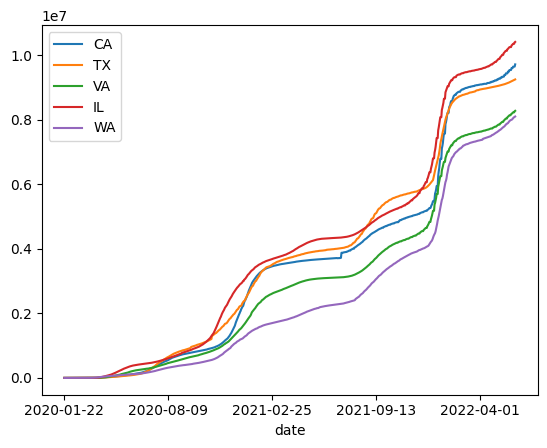

In [129]:
final_states_df.plot.line()

<Axes: xlabel='date'>

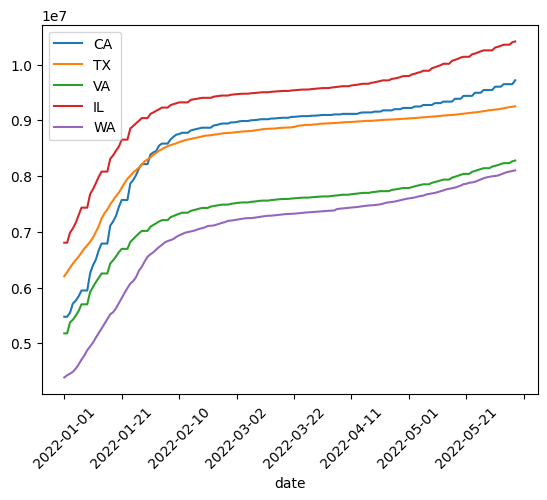

In [130]:
final_states_df['2022-01-01':].plot.line(rot=45)